# Bias plotting routines

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from datetime import datetime
import os

In [29]:
os.getcwd()

'/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/llamas_pyjamas'

In [30]:
#taken from night UT 2024-11-29 LLAMAS commissioning excel sheet bias list

# files = ['LLAMAS_2024-11-29T08_49_10.489_mef',
# 'LLAMAS_2024-11-29T08_50_51.614_mef',
# 'LLAMAS_2024-11-29T08_53_26.854_mef',
# 'LLAMAS_2024-11-29T08_54_57.824_mef',
# 'LLAMAS_2024-11-29T08_56_20.024_mef',
# 'LLAMAS_2024-11-29T09_05_16.585_mef',
# 'LLAMAS_2024-11-29T09_06_55.081_mef',
files = ['LLAMAS_2024-11-29T09_09_16.816_mef',
'LLAMAS_2024-11-29T09_24_50.008_mef',
'LLAMAS_2024-11-29T09_25_17.497_mef',
'LLAMAS_2024-11-29T09_26_08.543_mef',
'LLAMAS_2024-11-29T09_26_56.890_mef',
'LLAMAS_2024-11-29T09_27_58.541_mef',
'LLAMAS_2024-11-29T09_28_53.157_mef']

In [31]:
#only need to append to this for the first plot generated, after that can re-use these timestamps
x_axis = []

# Initialise lists for storing values

blue_bias_1A, blue_bias_1B = [], []
blue_bias_2A, blue_bias_2B = [], []
blue_bias_3A, blue_bias_3B = [], []
blue_bias_4A, blue_bias_4B = [], []

In [32]:
for idx, item in enumerate(files):
    filepath = f'../../comissioning_data/20241129/{item}.fits'
    #only need to run this bit in the first loop
    parts = item.split("_")
    stamp = parts[1]+':'+parts[2]+':'+parts[3]
    timestamp = datetime.strptime(stamp, "%Y-%m-%dT%H:%M:%S.%f")
    x_var = timestamp.strftime("%H:%M:%S")
    x_axis.append(x_var)
                            
    hdu = fits.open(filepath)
    blue_bias_1A.append(np.median(hdu[3].data[5:20, 1024])) # Increased HDU index by 1 from green, then +3 per benchside
    blue_bias_1B.append(np.median(hdu[6].data[5:20, 1024]))
    blue_bias_2A.append(np.median(hdu[9].data[5:20, 1024]))
    blue_bias_2B.append(np.median(hdu[12].data[5:20, 1024]))
    blue_bias_3A.append(np.median(hdu[15].data[5:20, 1024]))
    blue_bias_3B.append(np.median(hdu[18].data[5:20, 1024]))
    blue_bias_4A.append(np.median(hdu[21].data[5:20, 1024]))
    blue_bias_4B.append(np.median(hdu[24].data[5:20, 1024]))

In [33]:
print(x_axis)

['09:09:16', '09:24:50', '09:25:17', '09:26:08', '09:26:56', '09:27:58', '09:28:53']


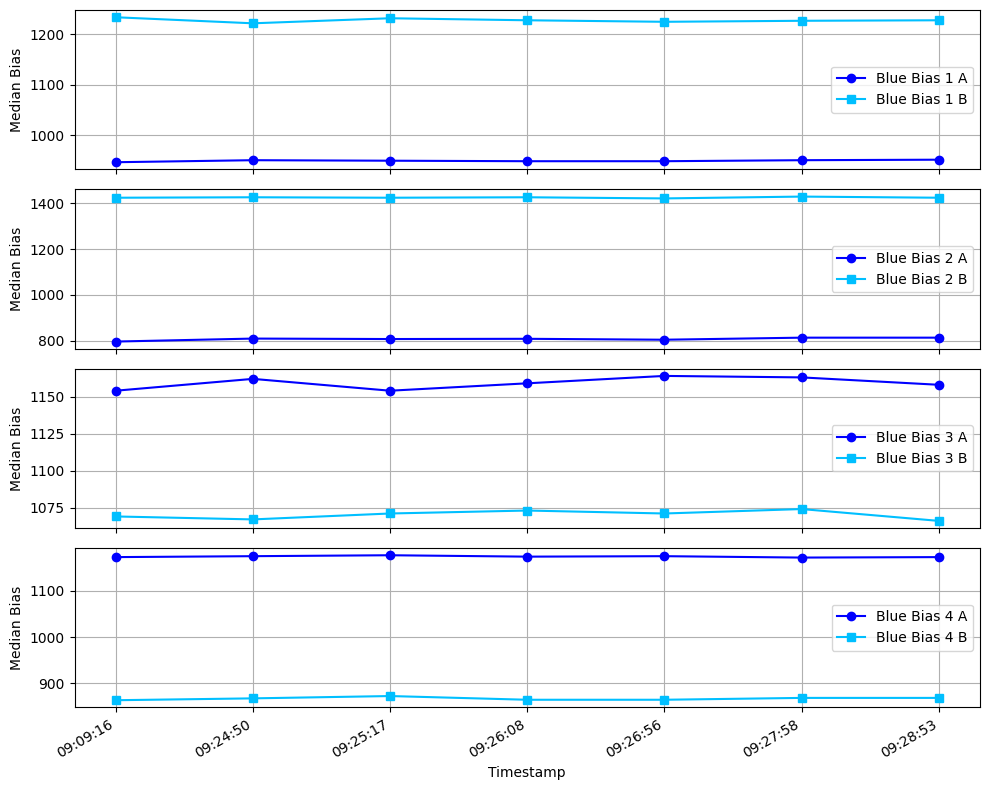

In [34]:
# Create figure with 4 subplots

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

  

# Define plot data

plot_data = [

(blue_bias_1A, blue_bias_1B, "Blue Bias 1"),
(blue_bias_2A, blue_bias_2B, "Blue Bias 2"),
(blue_bias_3A, blue_bias_3B, "Blue Bias 3"),
(blue_bias_4A, blue_bias_4B, "Blue Bias 4"),

]


# Plot each pair of NA and NB on separate subplots

for ax, (NA, NB, title) in zip(axes, plot_data):
    ax.plot(x_axis, NA, 'o-', label=f'{title} A', color='blue')    
    ax.plot(x_axis, NB, 's-', label=f'{title} B', color='deepskyblue') 
    ax.set_ylabel("Median Bias")   
    ax.legend()    
    ax.grid()

  

# Format x-axis
axes[-1].set_xlabel("Timestamp")
fig.autofmt_xdate() # Rotates x-ticks for readability
plt.tight_layout()
plt.show()

In [ ]:
for i in idx:
    data = exobj['extractions'][i].counts
    max_val, max_row = np.nanmax(data), np.nanargmax(np.max(data, axis=1))
    #print(i, max_val, max_row)
    row_sums = np.nansum(data, axis=1)
    max_sum = np.nanmax(row_sums)
    row_with_max_sum = np.argmax(row_sums)
    print(i, max_val, max_row, max_sum, row_with_max_sum)

---
# Dispersion plots

Number of extractions: 24
[{'channel': 'red', 'bench': 1, 'side': 'A', 'nfibers': 298}, {'channel': 'green', 'bench': 1, 'side': 'A', 'nfibers': 298}, {'channel': 'blue', 'bench': 1, 'side': 'A', 'nfibers': 298}, {'channel': 'red', 'bench': 1, 'side': 'B', 'nfibers': 300}, {'channel': 'green', 'bench': 1, 'side': 'B', 'nfibers': 300}, {'channel': 'blue', 'bench': 1, 'side': 'B', 'nfibers': 300}, {'channel': 'red', 'bench': 2, 'side': 'A', 'nfibers': 298}, {'channel': 'green', 'bench': 2, 'side': 'A', 'nfibers': 298}, {'channel': 'blue', 'bench': 2, 'side': 'A', 'nfibers': 298}, {'channel': 'red', 'bench': 2, 'side': 'B', 'nfibers': 297}, {'channel': 'green', 'bench': 2, 'side': 'B', 'nfibers': 297}, {'channel': 'blue', 'bench': 2, 'side': 'B', 'nfibers': 297}, {'channel': 'red', 'bench': 3, 'side': 'A', 'nfibers': 298}, {'channel': 'green', 'bench': 3, 'side': 'A', 'nfibers': 298}, {'channel': 'blue', 'bench': 3, 'side': 'A', 'nfibers': 298}, {'channel': 'red', 'bench': 3, 'side': 'B',

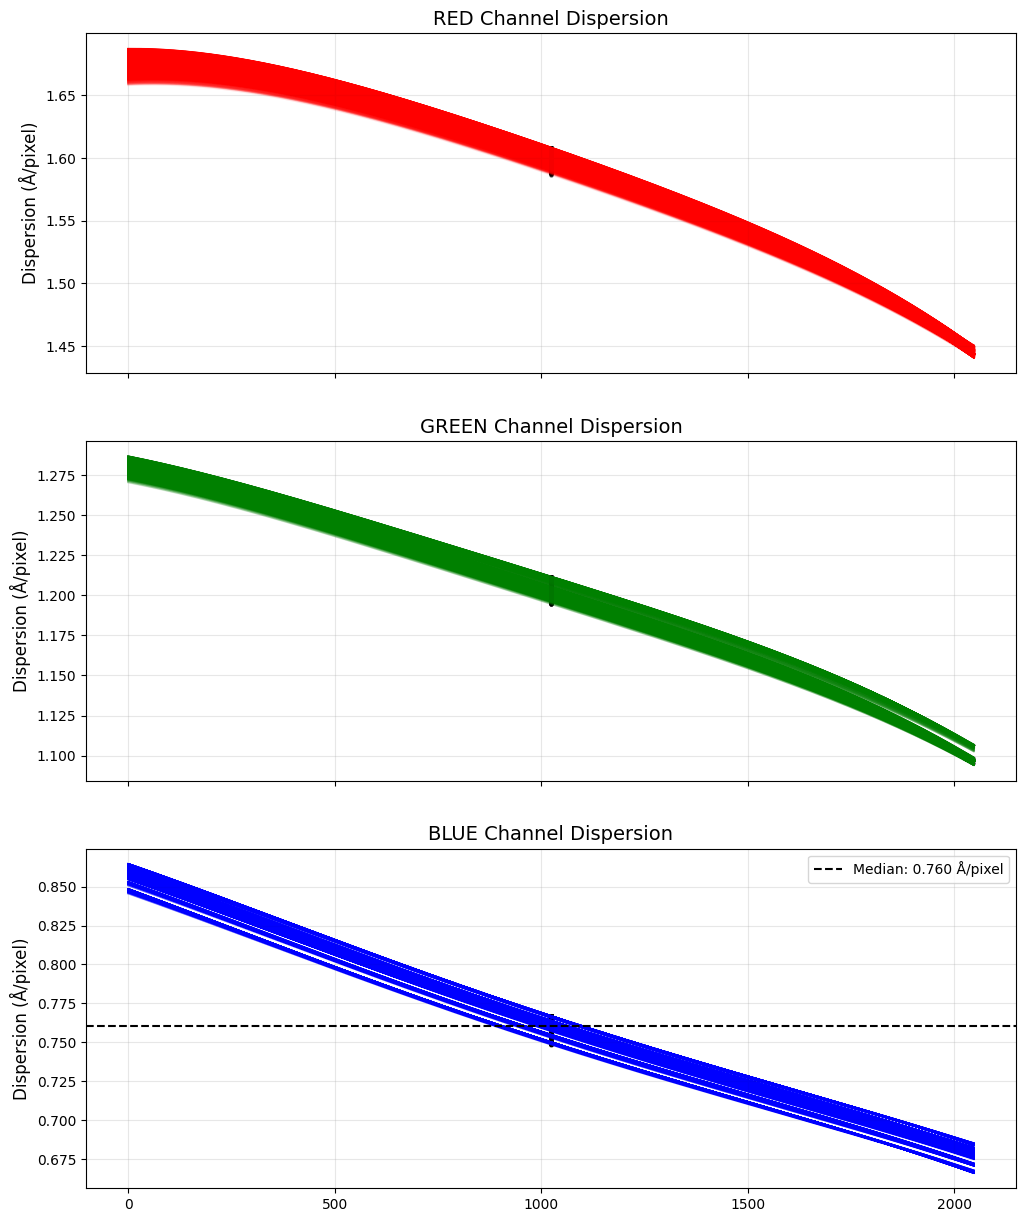

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

arc_file = '/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/llamas_pyjamas/LUT/LLAMAS_reference_arc.pkl'
with open(arc_file, 'rb') as f: 
    arc_data = pickle.load(f)

arcspec = arc_data['extractions']
metadata = arc_data['metadata']

print(f"Number of extractions: {len(arcspec)}")
print(metadata)


fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True) 
channel_axes = {'red': axes[0], 'green': axes[1], 'blue': axes[2]} 
colors = {'red': 'red', 'green': 'green', 'blue': 'blue'}

dispersion_stats = {}


for channel in ['red', 'green', 'blue']: 
    dispersion_stats[channel] = { 'median': [], 'min': [], 'max': [], 'fiber_nums': [], 'benchsides': [] }



    # Find extensions for this channel
    channel_extensions = [i for i in range(len(metadata)) 
                        if metadata[i]['channel'] == channel]

    ax = channel_axes[channel]

    for ext_idx in channel_extensions:
        benchside = f"{metadata[ext_idx]['bench']}{metadata[ext_idx]['side']}"
        
        # Get wavelength data
        wave_data = arcspec[ext_idx].wave
        nfibers, npix = wave_data.shape
        print(f"Processing {channel} channel, benchside {benchside}, {nfibers} fibers, {npix} pixels")
        print(f"processing from arc {arcspec[ext_idx].channel} channel, benchside {arcspec[ext_idx].bench} {arcspec[ext_idx].side}")
        # Calculate dispersion for each fiber
        for fiber in range(nfibers):
            # Get wavelength for this fiber
            wave = wave_data[fiber]
            
            # Calculate dispersion (dλ/dpixel)
            # Using gradient function to calculate the derivative
            dispersion = np.gradient(wave)
            
            # Remove outliers with sigma clipping
            dispersion_clean = sigma_clip(dispersion, sigma=3)
            valid_mask = ~dispersion_clean.mask
            
            if np.sum(valid_mask) > 10:  # Ensure we have enough valid points
                median_disp = np.median(dispersion[valid_mask])
                min_disp = np.min(dispersion[valid_mask])
                max_disp = np.max(dispersion[valid_mask])
                
                # Store statistics
                dispersion_stats[channel]['median'].append(median_disp)
                dispersion_stats[channel]['min'].append(min_disp)
                dispersion_stats[channel]['max'].append(max_disp)
                dispersion_stats[channel]['fiber_nums'].append(fiber)
                dispersion_stats[channel]['benchsides'].append(benchside)
                
                # Plot the dispersion curve for this fiber
                x = np.arange(len(dispersion))
                ax.plot(x, dispersion, alpha=0.1, color=colors[channel])
                
                # Plot a point for the median dispersion
                pixel_center = len(dispersion) // 2
                ax.scatter(pixel_center, median_disp, s=5, 
                        color='k', alpha=0.5)

    # Format the axis
    ax.set_title(f"{channel.upper()} Channel Dispersion", fontsize=14)
    ax.set_ylabel("Dispersion (Å/pixel)", fontsize=12)
    ax.grid(True, alpha=0.3)

# Add horizontal lines for reference
y_median = np.median(dispersion_stats[channel]['median'])
ax.axhline(y=y_median, color='k', linestyle='--', 
          label=f"Median: {y_median:.3f} Å/pixel")

# Add legend
ax.legend()

plt.show()